### Your tasks for this lab:

Create a jupyter notebook stored in /notebooks for your initial work. In it, start to document your process. Include some of the following:

- the topic you would like to focus on
- some initial data you found that could work for your analysis
- initial exploratory data analysis to see if data gathered is viable
- outside information that could be useful to your process (charts, articles, -  - links that are relevant to your topic.
- Find some initial data pertaining to your topic and store the files in the /data folder.
- If you would like to scrape data, find some source that could potentially be scraped and begin inspecting it for ways to obtain it. It might be beneficial to do this in a jupyter notebook initially and then once you have some working code, place it into a *.py file in /scripts.
- Create a README.md file containing information about your project. Keep it simple. We'll continue to add to this over time.
- An initial view in your django application (we'll learn templating next week but feel free to work ahead)

[Kaggle link to dataset](https://www.kaggle.com/zayanmakar/infectious-diseases-county-year-and-sex)

### Topic:  Infectious Diseases

-antibiotic resistance microorganisms (still need to find dataset)

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/infectious-diseases-by-county-year-and-sex.csv')

In [44]:
df.head(6)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Amebiasis,Alameda,2001,Female,7.0,746596,0.938*,0.377,1.932
1,Amebiasis,Alameda,2001,Male,9.0,718968,1.252*,0.572,2.376
2,Amebiasis,Alameda,2001,Total,16.0,1465564,1.092*,0.624,1.773
3,Amebiasis,Alameda,2002,Female,4.0,747987,0.535*,0.146,1.369
4,Amebiasis,Alameda,2002,Male,5.0,720481,0.694*,0.225,1.620
5,Amebiasis,Alameda,2002,Total,9.0,1468468,0.613*,0.280,1.163


#### Information about dataset:

Infectious Diseases by Disease, County, Year, and Sex

This dataset contains case counts and rates for selected communicable diseases—listed in the data dictionary—that met the surveillance case definition for that disease and was reported for California residents, by disease, county, year, and sex. The data represent cases with an estimated illness onset date from 2001 through the last year indicated from California Confidential Morbidity Reports and/or Laboratory Reports. Data captured represent reportable case counts as of the date indicated in the “Temporal Coverage” section below, so the data presented may differ from previous publications due to delays inherent to case reporting, laboratory reporting, and epidemiologic investigation.

Rate
"Incidence rate is the number of cases per 100,000 population per County, Year, and Sex using the calculation ((Cases *100,000)/Population).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164433 entries, 0 to 164432
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       164433 non-null  object 
 1   County        164433 non-null  object 
 2   Year          164433 non-null  int64  
 3   Sex           164433 non-null  object 
 4   Cases         160313 non-null  float64
 5   Population    164433 non-null  int64  
 6   Rate          164433 non-null  object 
 7   Lower_95__CI  159452 non-null  float64
 8   Upper_95__CI  159452 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [9]:
df.nunique()

Disease            53
County             59
Year               19
Sex                 3
Cases             906
Population       3326
Rate            12105
Lower_95__CI     8446
Upper_95__CI    14065
dtype: int64

#### Visualizing the distribution of years

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

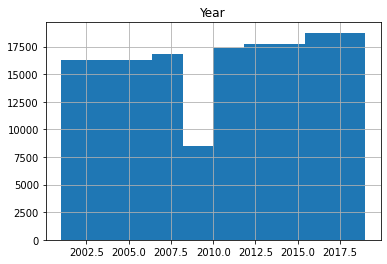

In [10]:
df.hist(column='Year')

### Finding the different categories of columns:

In [25]:
def categories(lst):
    for column in lst:
        print(f'printing for {column}')
        print(df[column].unique())

lst = ['Disease', 'County']
categories(lst)

printing for Disease
['Amebiasis' 'Anaplasmosis' 'Anthrax' 'Babesiosis' 'Botulism, Foodborne'
 'Botulism, Other' 'Botulism, Wound' 'Brucellosis' 'Campylobacteriosis'
 'Chikungunya Virus Infection' 'Cholera' 'Ciguatera Fish Poisoning'
 'Coccidioidomycosis'
 'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies'
 'Cryptosporidiosis' 'Cyclosporiasis' 'Cysticercosis or Taeniasis'
 'Dengue Virus Infection' 'Domoic Acid Poisoning' 'Ehrlichiosis'
 'Flavivirus Infection of Undetermined Species' 'Giardiasis'
 'Hantavirus Infection' 'Hemolytic Uremic Syndrome'
 'Hepatitis E, acute infection' 'Legionellosis' 'Leprosy' 'Leptospirosis'
 'Listeriosis' 'Lyme Disease' 'Malaria' 'Paralytic Shellfish Poisoning'
 'Paratyphoid Fever' 'Plague, human' 'Psittacosis' 'Q Fever'
 'Rabies, human' 'Relapsing Fever' 'Salmonellosis'
 'Scombroid Fish Poisoning'
 'Shiga toxin-producing E. coli (STEC) with HUS'
 'Shiga toxin-producing E. coli (STEC) without HUS' 'Shigellosis'
 'Spotted Fever R

In [19]:
df[df['Cases'].isna()]

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
249,Amebiasis,Calaveras,2008,Female,NaN,22864,SC,NaN,NaN
250,Amebiasis,Calaveras,2008,Male,NaN,22838,SC,NaN,NaN
657,Amebiasis,Glenn,2011,Female,NaN,14044,SC,NaN,NaN
658,Amebiasis,Glenn,2011,Male,NaN,14329,SC,NaN,NaN
669,Amebiasis,Glenn,2015,Female,NaN,14280,SC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164338,Zika Virus Infection,Sutter,2016,Male,NaN,48745,SC,NaN,NaN
164340,Zika Virus Infection,Sutter,2017,Female,NaN,49446,SC,NaN,NaN
164341,Zika Virus Infection,Sutter,2017,Male,NaN,48896,SC,NaN,NaN
164421,Zika Virus Infection,Yuba,2016,Female,NaN,37475,SC,NaN,NaN


## Research 

28 Devastating Infectious Diseases from livescience.com

In [46]:
import requests
from bs4 import BeautifulSoup

In [55]:
response = requests.get('https://www.livescience.com/13694-devastating-infectious-diseases-smallpox-plague.html')
soup = BeautifulSoup(response.content, 'html.parser')
name_of_diseases = soup.find_all('h2')

print('28 Devastating Infectious Diseases')
lst = [item.text for item in name_of_diseases]
print(lst)

28 Devastating Infectious Diseases
['The new coronavirus', 'Smallpox', 'Plague', 'Malaria', 'Influenza', 'Tuberculosis', 'HIV/AIDS', 'Cholera', 'Rabies', 'Pneumonia', 'Infectious diarrhea', 'Ebola', 'Variant Creutzfeldt-Jakob disease', 'Marburg', 'Middle East respiratory syndrome (MERS)', 'Dengue', 'Yellow fever', 'Hantaviruses', 'Anthrax', 'MRSA "superbug"', 'Pertussis', 'Tetanus', 'Meningitis', 'Syphilis', 'SARS', 'Leprosy', 'Measles', 'Zika']


#### All the diseases found in the dataframe

In [56]:
diseases_lst = df['Disease'].unique()
diseases_lst

array(['Amebiasis', 'Anaplasmosis', 'Anthrax', 'Babesiosis',
       'Botulism, Foodborne', 'Botulism, Other', 'Botulism, Wound',
       'Brucellosis', 'Campylobacteriosis', 'Chikungunya Virus Infection',
       'Cholera', 'Ciguatera Fish Poisoning', 'Coccidioidomycosis',
       'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies',
       'Cryptosporidiosis', 'Cyclosporiasis',
       'Cysticercosis or Taeniasis', 'Dengue Virus Infection',
       'Domoic Acid Poisoning', 'Ehrlichiosis',
       'Flavivirus Infection of Undetermined Species', 'Giardiasis',
       'Hantavirus Infection', 'Hemolytic Uremic Syndrome',
       'Hepatitis E, acute infection', 'Legionellosis', 'Leprosy',
       'Leptospirosis', 'Listeriosis', 'Lyme Disease', 'Malaria',
       'Paralytic Shellfish Poisoning', 'Paratyphoid Fever',
       'Plague, human', 'Psittacosis', 'Q Fever', 'Rabies, human',
       'Relapsing Fever', 'Salmonellosis', 'Scombroid Fish Poisoning',
       'Shiga toxin-pr

#### Checking the diseases from the dataframe that are mentioned as part of the 28 Devastating Infectious Diseases from livescience.com

In [52]:
for diseases in lst:
    if diseases in diseases_df:
        print(diseases)

Malaria
Cholera
Anthrax
Leprosy


### What are infectious Diseases?

Infectious Diseases are diseases caused by pathogenic microorganisms - such as parasites, viruses, or bacteria.

They can be spread, indirectly or directly (vector-borne), from animals to humans, and from person to another.

When the immune system of a host is fully functional, disease symptoms may not develop whenever an infectious organism attacks it. But, if the host immune system is compromised, or the infectious organism overwhelms the immune system, an infectious disease may take over the host's immune system. 

The discovery of antibiotics has helped slow down the spread of infectious diseases, but the misused and overused of them are creating antibiotic-resistant bacteria. It is critical to keep track of infectious diseases as they are a major public health problem.

[source](https://www.sciencedirect.com/topics/immunology-and-microbiology/infectious-diseases)

#### More links

[Modeling the coronavirus disease 2019 pandemic: A comprehensive guide of infectious disease and decision-analytic models](sciencedirect.com/science/article/pii/S089543562031204X)

[Information about infectious diseases](https://www.nfid.org/infectious-diseases/)

[The potential of wastewater-based epidemiology as surveillance and early warning of infectious disease outbreaks](https://www.sciencedirect.com/science/article/abs/pii/S2468584420300337)

[Common Infectious Diseases](https://www.sciencedirect.com/science/article/abs/pii/S0095454320300907)